In [1]:
# Requerimos Python ≥3.5
# import sys
# assert sys.version_info >= (3, 5)

# Requerimos scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Importaciones comunes
import numpy as np
import os

# Salidas aleatorias reproducibles
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Las figuras se guardaran en la carpeta "images" junto al notebook
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Funcion para guardar figuras (Falta revisión para que funcione en colab)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# Descarga de archivos
from google.colab import files

# Funcion para guardar dataframe como csv
def save_df_as_cv(downloable_df, name):
  # Descarga del df 
  downloable_df.to_csv(name + '.csv')
  files.download(name + '.csv')

In [3]:
# Carga de datos
import pandas as pd 
# Carga del dataset
df_estilos_aprendizaje = pd.read_csv('estilos_aprendizaje_codificado.csv')

df_estilos_aprendizaje.keys()

Index(['Unnamed: 0', 'timestamp', 'edad', 'v', 'a', 'k', 'v_percent',
       'a_percent', 'k_percent', 'Bachillerato',
       ...
       '37_v', '38_a', '38_k', '38_v', '39_a', '39_k', '39_v', '40_a', '40_k',
       '40_v'],
      dtype='object', length=157)

## Clasificacion SVM lineal

In [4]:
# Importar función train_test_split
from sklearn.model_selection import train_test_split

# Funcion para separar conjuntos de entrenamiento y pruebas
def train_test_separate(X, y):
  # 70% training and 30% test
  return train_test_split(X, y, test_size=0.3, random_state=109)

In [5]:
# Importamos Clasificador de Soporte Vectorial (SVC) de scikit-learn
from sklearn.svm import SVC

# Funcion para entrenar y predecir con el modelo
def predcitWithSVM(X_train, y_train, X_test):
  # Recurrimos a un modelo SVM clasificador con un kernel lineal
  svm_clf = SVC(kernel="linear", C=float("inf"))

  # Entrenamos el modelo
  svm_clf.fit(X_train, y_train)

  # Predecir la respuesta para el conjunto de datos de prueba
  y_pred = svm_clf.predict(X_test)

  return y_pred

In [6]:
# Importa el módulo de métricas de scikit-learn para el cálculo de precisión
from sklearn import metrics

# Funcion para evaluar de manera simple el modelo
def evaluateSVMSimple(y_test, y_pred, target):
  print("\nTarget Class:", target)
  
  # Accuracy del modelo: ¿con qué frecuencia es correcto el clasificador?
  print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 2) )

  # Precision del modelo: ¿qué porcentaje de tuplas positivas se etiquetan como tales?
  print("Precision:", round(metrics.precision_score(y_test, y_pred), 2) )

  # Recall del modelo: ¿qué porcentaje de tuplas positivas están etiquetadas como tales?
  print("Recall:", round(metrics.recall_score(y_test, y_pred), 2) )

In [7]:
# Funcion para evaluar y mostrar matriz de confusión
def evaluateSVM(y_test, y_pred, target):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix class " + target)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))

In [8]:
# Seleccionando solo datos utiles
# Estas contienen las preguntas extras que no corresponden al test
preguntas = df_estilos_aprendizaje.iloc[:, 9:28]
# Estas contienen las 40 preguntas que corresponden al test
preguntas_test = df_estilos_aprendizaje.iloc[:, 37:157]

frames_FULL = [preguntas, preguntas_test]
frames = [preguntas_test]

X_FULL = pd.concat(frames_FULL, axis=1)
X = pd.concat(frames, axis=1)

# Se definen las clases objetivo
y_visual = df_estilos_aprendizaje["estilo_primario_visual"]
y_auditivo = df_estilos_aprendizaje["estilo_primario_auditivo"]
y_kinestesico = df_estilos_aprendizaje["estilo_primario_kinestesico"]

## Prediciendo solo con las 40 preguntas del test

### Clase objetivo: VISUAL

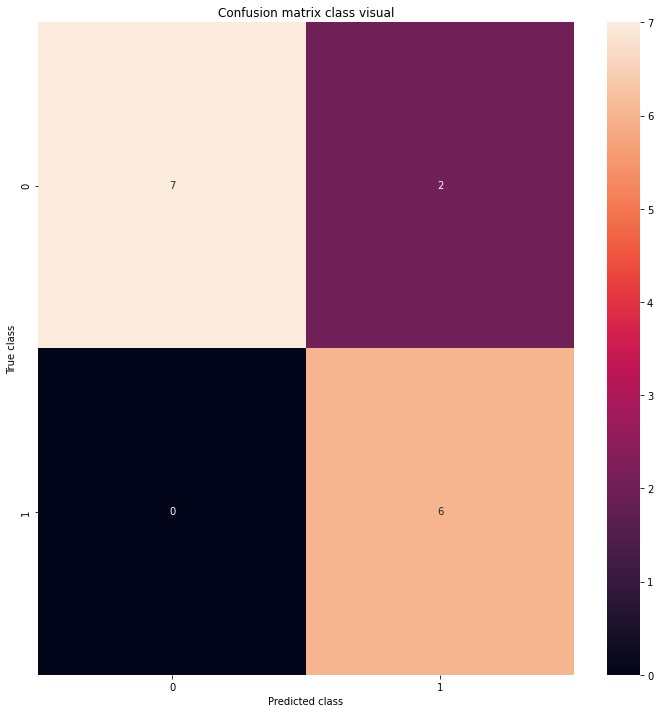

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.75      1.00      0.86         6

    accuracy                           0.87        15
   macro avg       0.88      0.89      0.87        15
weighted avg       0.90      0.87      0.87        15



In [9]:
##### VISUAL #####

# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_separate(X, y_visual)

# Se entrena y predice 
y_pred = predcitWithSVM(X_train, y_train, X_test)

# Se evalua el modelo
evaluateSVM(y_test, y_pred, 'visual')

### Clase objetivo: AUDITIVO

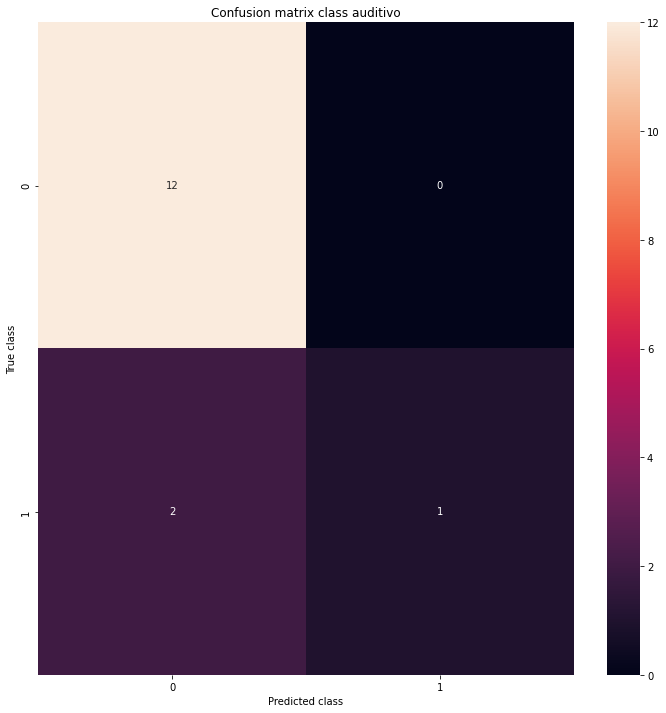

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.33      0.50         3

    accuracy                           0.87        15
   macro avg       0.93      0.67      0.71        15
weighted avg       0.89      0.87      0.84        15



In [10]:
##### AUDITIVO #####

# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_separate(X, y_auditivo)

# Se entrena y predice 
y_pred = predcitWithSVM(X_train, y_train, X_test)

# Se evalua el modelo
evaluateSVM(y_test, y_pred, 'auditivo')

### Clase objetivo: KINESTESICO

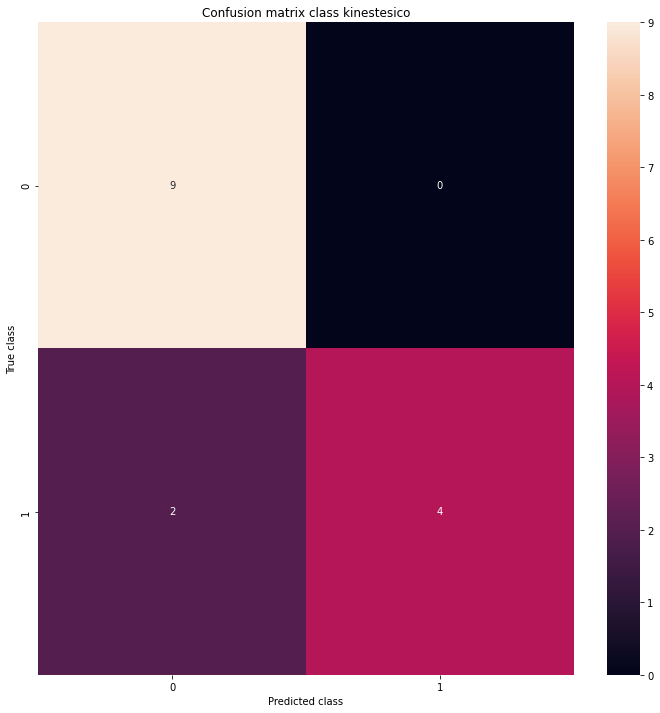

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.67      0.80         6

    accuracy                           0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15



In [11]:
##### KINESTESICO #####

# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_separate(X, y_kinestesico)

# Se entrena y predice 
y_pred = predcitWithSVM(X_train, y_train, X_test)

# Se evalua el modelo
evaluateSVM(y_test, y_pred, 'kinestesico')

## Prediciendo con las 40 preguntas del test + las preguntas extras

### Clase objetivo: VISUAL

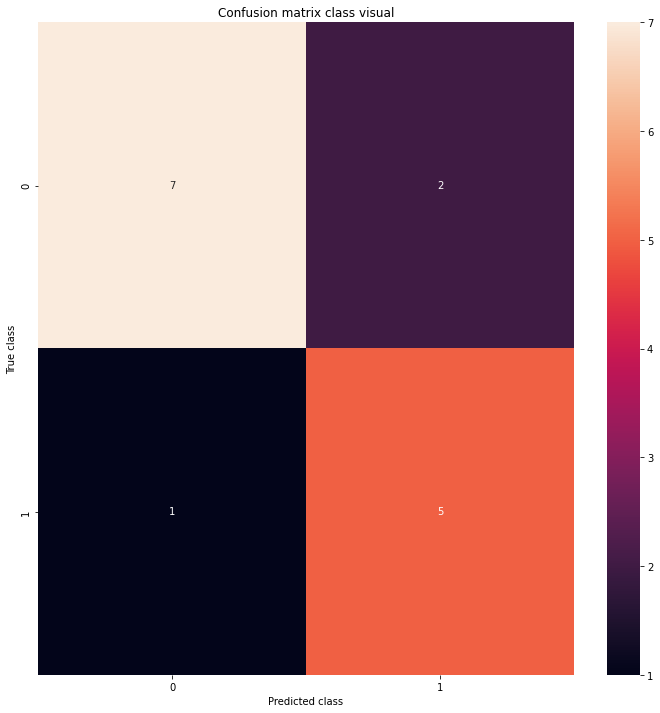

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.71      0.83      0.77         6

    accuracy                           0.80        15
   macro avg       0.79      0.81      0.80        15
weighted avg       0.81      0.80      0.80        15



In [12]:
##### VISUAL #####

# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_separate(X_FULL, y_visual)

# Se entrena y predice 
y_pred = predcitWithSVM(X_train, y_train, X_test)

# Se evalua el modelo
evaluateSVM(y_test, y_pred, 'visual')

### Clase objetivo: AUDITIVO

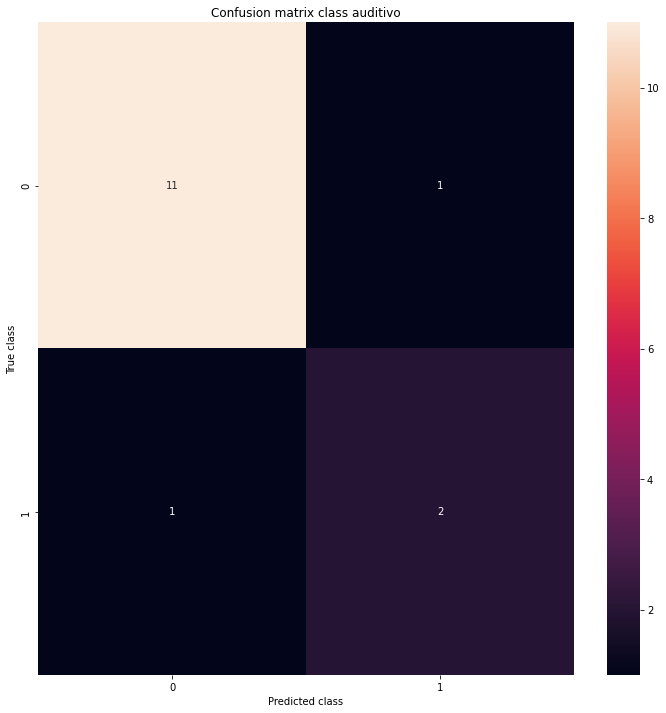

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.67      0.67      0.67         3

    accuracy                           0.87        15
   macro avg       0.79      0.79      0.79        15
weighted avg       0.87      0.87      0.87        15



In [13]:
##### AUDITIVO #####

# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_separate(X_FULL, y_auditivo)

# Se entrena y predice 
y_pred = predcitWithSVM(X_train, y_train, X_test)

# Se evalua el modelo
evaluateSVM(y_test, y_pred, 'auditivo')

### Clase objetivo: KINESTESICO

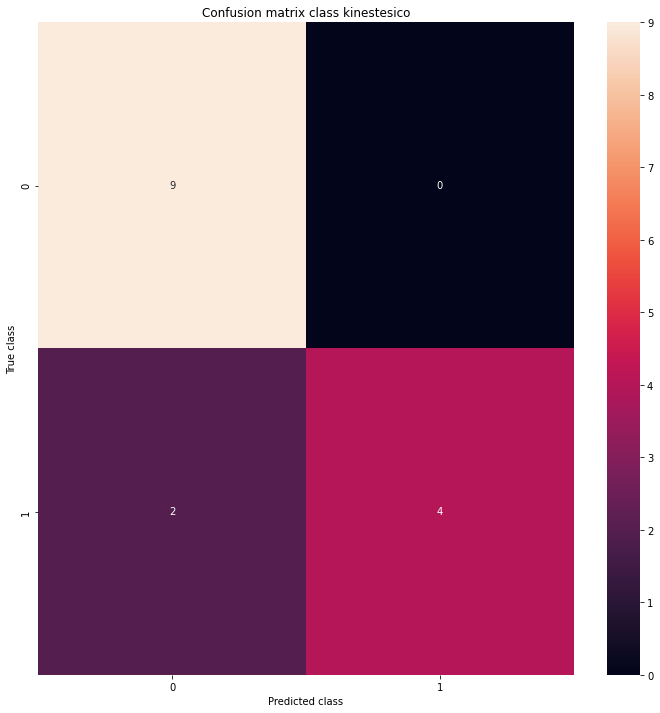

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.67      0.80         6

    accuracy                           0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15



In [14]:
##### KINESTESICO #####

# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_separate(X_FULL, y_kinestesico)

# Se entrena y predice 
y_pred = predcitWithSVM(X_train, y_train, X_test)

# Se evalua el modelo
evaluateSVM(y_test, y_pred, 'kinestesico')

# Comparación de resultados con todas las preguntas y solo las correspondientes a las 40 del test


### Clase objetivo: VISUAL

In [15]:
##### VISUAL FULL #####

# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_separate(X_FULL, y_visual)

# Se entrena y predice 
y_pred = predcitWithSVM(X_train, y_train, X_test)

# Se evalua el modelo
evaluateSVMSimple(y_test, y_pred, 'visual full')

##### VISUAL #####

# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_separate(X, y_visual)

# Se entrena y predice 
y_pred = predcitWithSVM(X_train, y_train, X_test)

# Se evalua el modelo
evaluateSVMSimple(y_test, y_pred, 'visual')


Target Class: visual full
Accuracy: 0.8
Precision: 0.71
Recall: 0.83

Target Class: visual
Accuracy: 0.87
Precision: 0.75
Recall: 1.0


### Clase objetivo: AUDITIVO

In [16]:
##### AUDITIVO FULL #####

# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_separate(X_FULL, y_auditivo)

# Se entrena y predice 
y_pred = predcitWithSVM(X_train, y_train, X_test)

# Se evalua el modelo
evaluateSVMSimple(y_test, y_pred, 'auditivo full')

##### AUDITIVO #####

# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_separate(X, y_auditivo)

# Se entrena y predice 
y_pred = predcitWithSVM(X_train, y_train, X_test)

# Se evalua el modelo
evaluateSVMSimple(y_test, y_pred, 'auditivo')


Target Class: auditivo full
Accuracy: 0.87
Precision: 0.67
Recall: 0.67

Target Class: auditivo
Accuracy: 0.87
Precision: 1.0
Recall: 0.33


### Clase objetivo: KINESTESICO

In [17]:
##### KINESTESICO FULL #####

# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_separate(X_FULL, y_kinestesico)

# Se entrena y predice 
y_pred = predcitWithSVM(X_train, y_train, X_test)

# Se evalua el modelo
evaluateSVMSimple(y_test, y_pred, 'kinestesico full')

##### KINESTESICO #####

# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_separate(X, y_kinestesico)

# Se entrena y predice 
y_pred = predcitWithSVM(X_train, y_train, X_test)

# Se evalua el modelo
evaluateSVMSimple(y_test, y_pred, 'kinestesico')


Target Class: kinestesico full
Accuracy: 0.87
Precision: 1.0
Recall: 0.67

Target Class: kinestesico
Accuracy: 0.87
Precision: 1.0
Recall: 0.67


# Conclusiones

Hemos aplicado el modelo para cada una de las clases objetivo, y también usando dos conjunto de datos donde en uno estan todos los datos completos y otro donde solo los correspondientes a las 40 preguntas del test vak.

Como se puede ver para cada tipo de clase objetivo, de manera general tenemos combinaciones de alta precision con alto recall(para las clases visual y kinestesico) y alta precisión y bajo recall(para la clase auditiva).

En la clase objetivo kinestesica el modelo parece ser estable en ambos  conjuntos de datos.
Para la clase objetivo visual, con el conjunto de datos que usa todos los datos el modelo parece disminuir un poco la precision y el recall.

Y para el auditivo con el conjunto de datos que usa todos los datos pierde un poco de precision pero gana un poco de recall encomparacion con el conjunto que solo tiene las 40 preguntas del test.

Respecto al accuracy se puede decir que en cada clase objetivo se mantuvo estable con cada conjunto de datos.